# Chapter4

## 신경망 학습
- 학습이란?
	- 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻 합니다.


### 목표
	1. 장에서는 신경망이 학습 할 수 있도록 해주는 지표인 '손실 함수'를 소개하겠습니다.
	2. 신경망 학습(데이터로부터 매개변수의 값을 정하는 방법)에 대해서 설명하고 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현해보겠습니다.

#### 4.1.1 데이터 주도 학습
```
MNIST에서 해당 숫자들을 인식하는 방법은, 이미지에서 특징(Feature)을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있습니다. 
이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있습니다.
다만, 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 '사람'이 설계하는 것임을 주의해야 합니다.
```

- 이러한 문제를 해결하기 위해 딥러닝은 '종단간 기계학습(end-to-end machine learning')이라고도 합니다. 처음부터 끝까지 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 의미를 가지고 있습니다.

#### 4.1.2 훈련 데이터와 시험 데이터
- 두 데이터를 나눈 이유?
	- '범용 능력'을 제대로 평가하기 위함입니다. 범용능력은 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력입니다.
- 오버피팅(overfitting)이란?
	- 예를들어, 범용능력은 '특정인의 특정 손글씨'를 판별하는 것이아니라 '임의의 사람의 임의의 글자'를 올바르게 판별해야 합니다. 하지만, 한 데이터셋에만 지나치게 최적화된 교육이 이루어지면 '오버피팅'이 발생합니다.

#### 4.2 손실 함수
- 손실함수란?
	- 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현합니다. 그리고 그 지표를 가장 좋게 만들어주는 최적의 가중치 매개변수의 값을 탐색합니다. 이처럼 신경망 학습에서 사용하는 지표는 '손실 함수(loss function)'라고 합니다.
	- 일반적으로, 평균 제곱 오차(MSE : mean squared error)와 교차 엔트로피 오차를 사용합니다.
	- 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표입니다. 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 못 하고 있는지를 나타내는 지표입니다.

#### 4.2.1 평균 제곱 오차(MSE : mean squared error)
- <img src="https://i.stack.imgur.com/iSWyZ.png" width="300" height="30">
- yi는 신경망의 출력(신경망이 추정한 값), ti는 정답 레이블. i는 데이터의 차원 수를 나타냅니다.

In [56]:
import numpy as np
import matplotlib.pylab as plt

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [57]:
# 정답 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 원-핫 인코딩
# => 정답 레이블, 정답은 1 나머지는 0 

# 예1
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 소프트 맥스 함수
# => 0일 확률 0.1, 1일 확률 0.05 ... 의미

mean_squared_error(np.array(y), np.array(t))

0.097500000000000031

In [58]:
# 예2 : '7'일 확률이 가장 높다고 추정함(0.6)
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # 소프트 맥스 함수
# => 0일 확률 0.1, 1일 확률 0.05 ... 의미

mean_squared_error(np.array(y2), np.array(t))

0.59750000000000003

#### 평균 제곱 오차 예제 내용 
- 첫 번째 예의 손실 함수 쪽 출력이 작으면 정답 레이블과의 오차도 적은 것을 알 수 있습니다. 즉, 평균 제곱 오차를 기준으로는 첫 번째 추정 결과가(오차가 더 작은 값) 정답에 더 가까울 것으로 팓단 할 수 있습니다.


#### 4.2.2 교차 엔트로피 오차(CEE : cross entropy error)

- <img src="https://cdn-images-1.medium.com/max/1200/0*MwrNEv6bD8TGCGBj." width="300" height="30">
- 교차 엔트로피의 오차는 정답일 때의 출력이 전체 값을 정합니다.

In [59]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))
# np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산이 진행될 수 없기에 아주 작은 값을 더해 0이 되지 않도록 합니다.

In [60]:
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [61]:
cross_entropy_error(np.array(y2), np.array(t))

2.3025840929945458

#### 교차 엔트로피 오차 예제 내용 
- 첫 번째 예는 정답일 때의 출력이 0.6인 경우로, 교차 엔트로피 오차는 약 0.51입니다.
- 다음, 두번 째 예는 정답일 때의 출력이 0.1인 경우로, 교차 엔트로피 오차는 2.3입니다.
- 즉, 오차 값이 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로 평균 제곱 오차의 판단과 일치합니다.

#### 4.2.3 미니배치 학습
- 신경망 학습에서 훈련 데이터로부터 일부만 골라 학습을 수행합니다. 이를 '미니배치 학습'이라고 합니다.

In [62]:
import sys, os
sys.path.append("../example/") # go to parent dir
from example.dataset.mnist import load_mnist
from example.common.functions import sigmoid, step_function

In [63]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


#### 미니배치 예제 내용
- 훈련 데이터 60000개, 입력 데이터 784열 = (28 * 28) 이미지 데이터
- 정답 레이블은 10줄짜리 데이터

```
그렇다면, 이 훈련 데이터에서 무작위로 10장을 빼내려면 어떻게 해야 할까요?
np.random.choise() 함수를 사용 할 수 있습니다.
ex) np.random.choise(60000, 10) : 60000개 중 10개를 random으로 추출
```

In [64]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [65]:
batch_mask

array([55102, 31246, 33515,  9473, 12150, 56382, 42196,   717, 35551, 55624])

#### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

- 여기에서는 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현하겠습니다.

In [66]:
# 정답 레이블이 One-Hot-Encoding으로 주어졌을 때.
def cross_entropy_error_for_batch(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size
# y는 신경망의 출력, t는 정답 레이블
# y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우, reshape로 데이터 형상을 바꿔줍니다.

In [67]:
# 정답 레이블이 One-Hot-Encoding으로 주어지지 않았을 때.
def cross_entropy_error_for_batch2(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
# y는 신경망의 출력, t는 정답 레이블
# y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우, reshape로 데이터 형상을 바꿔줍니다.

#### (배치용)교차 엔트로피 오차 예제 내용 
- 위의 예제 함수들에서의 핵심은, One-Hot-Encoding 일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로 그 계산은 무시해도 좋다는 것이 핵심입니다.
- y[np.arange(batch_size), t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출합니다.

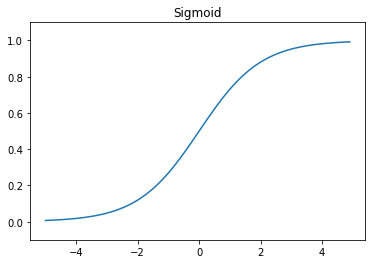

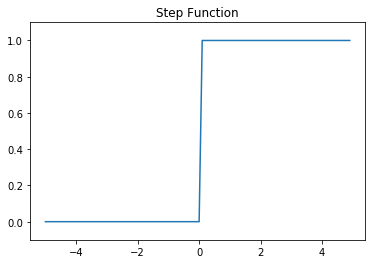

In [73]:
x= np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.title("Sigmoid")
plt.ylim(-0.1, 1.1)
plt.show()

y2 = step_function(x)
plt.plot(x, y2)
plt.title("Step Function")
plt.ylim(-0.1, 1.1)
plt.show()

#### 4.2.5 손실 함수를 설정하는 이유
- 신경망 학습에서는 최적의 매개변수(가중치와 편향)를 탐색할 때 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾습니다.
- 이때, 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복합니다.
- '가중치 매개변수의 손실함수의 미분'이란, 가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하는가의 의미입니다.
- 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다.
    - 100개에서 32개를 올바르게 판단했다면 정확도는 32%입니다. 만약, 정확도가 지표라면, 가중치 매개변수의 값을 조금 바꾼다고 해도 정확도는 그대로 32%입니다.
    - 이는, 계단 함수를 이용하지 않는 이유와도 같습니다. 계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수의 미분은 연속적으로 변하고 곡선의 기울기도 연속적으로 변합니다.
    - 즉, 시그모이드 함수의 미분은 어느 장소라도 0이 되지 않습니다. 신경망 학습에서 중요한 설질로, 기울기가 0이 되지 않는 덕분에 신경망이 올바르게 학습 할 수 있는 것.

#### 4.3 수치 미분
- 경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정합니다.

#### 4.3.1 미분
- 미분은 '특정 순간'의 변화량을 뜻합니다.
- 미분은 한 순간의 변화량을 표시한 것 

In [74]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2 * h)

#### 4.3.2 수치 미분의 예
- y = 0.01*x**2 + 0.1*x

In [75]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

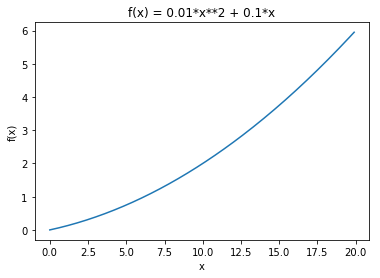

In [83]:
x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 X를 만든다.
y = function_1(x)
plt.title("f(x) = 0.01*x**2 + 0.1*x")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

#### X가 5, 10일 때의 함수의 미분 값 계산
- 계산한 미분 값이 x에 대한 f(x)의 변화량

In [84]:
numerical_diff(function_1, 5)

0.1999999999990898

In [85]:
numerical_diff(function_1, 10)

0.2999999999986347